In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
file_path = './data/train_dataframes.xlsx'
xls = pd.ExcelFile(file_path)

sheet_names = xls.sheet_names
sheet_names

# Load data from the first sheet
week_data = pd.read_excel(file_path, sheet_name='Week 01, Jan 2020')
week_data.head()

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


In [5]:
file_path = 'data/continuous dataset.csv'
Train_data = pd.read_csv(file_path)
Train_data_demand_extract = pd.read_csv(file_path ,index_col=[0],parse_dates=[0])

In [6]:
Train_data.tail()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1
48047,2020-06-27 00:00:00,1013.5683,26.750330,0.020441,0.063965,10.198346,25.125330,0.019281,0.100189,2.785751,23.562830,0.018404,0.162598,3.286878,0,0,1


In [7]:
Train_data.isna().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [8]:
Train_data.describe(include="all")

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,48048,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
unique,48048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-03 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,NaN,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,NaN,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,NaN,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,NaN,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,NaN,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000


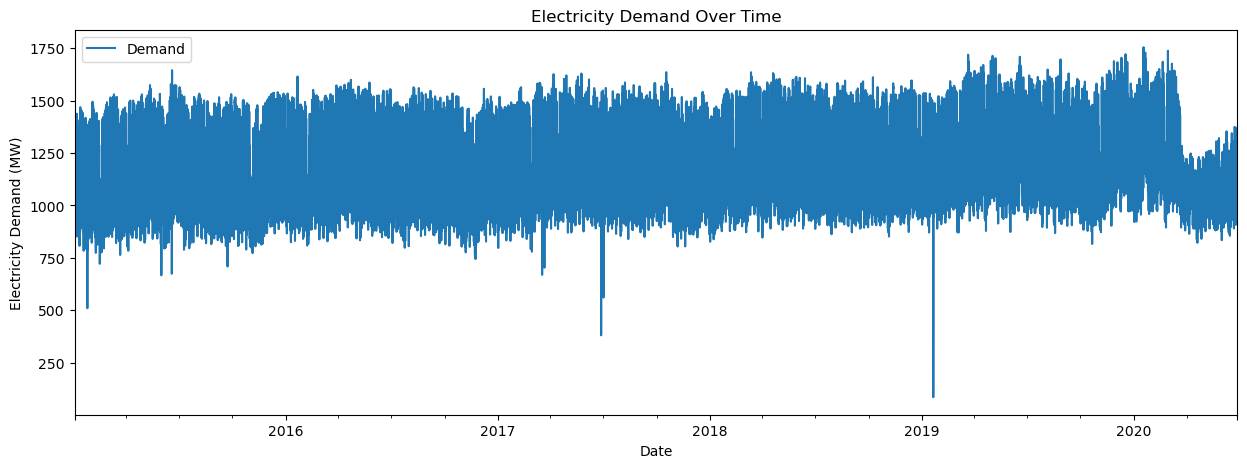

In [9]:

# Electricity demand over time
Train_data['datetime'] = pd.to_datetime(Train_data['datetime'])
Train_data.plot(x="datetime",y="nat_demand",label ="Demand",figsize=(15,5))
plt.title('Electricity Demand Over Time')
plt.xlabel("Date")
plt.ylabel("Electricity Demand (MW)")
plt.show()

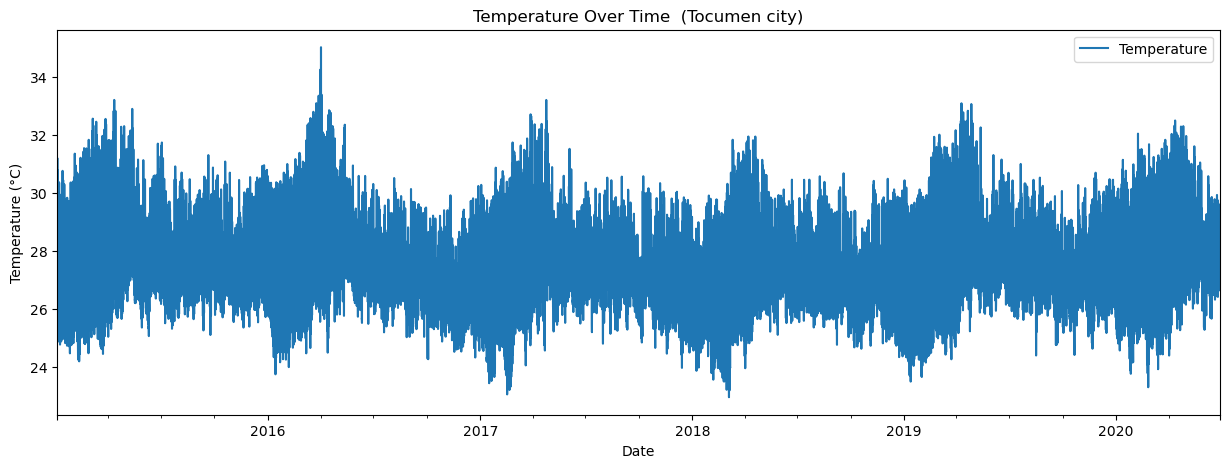

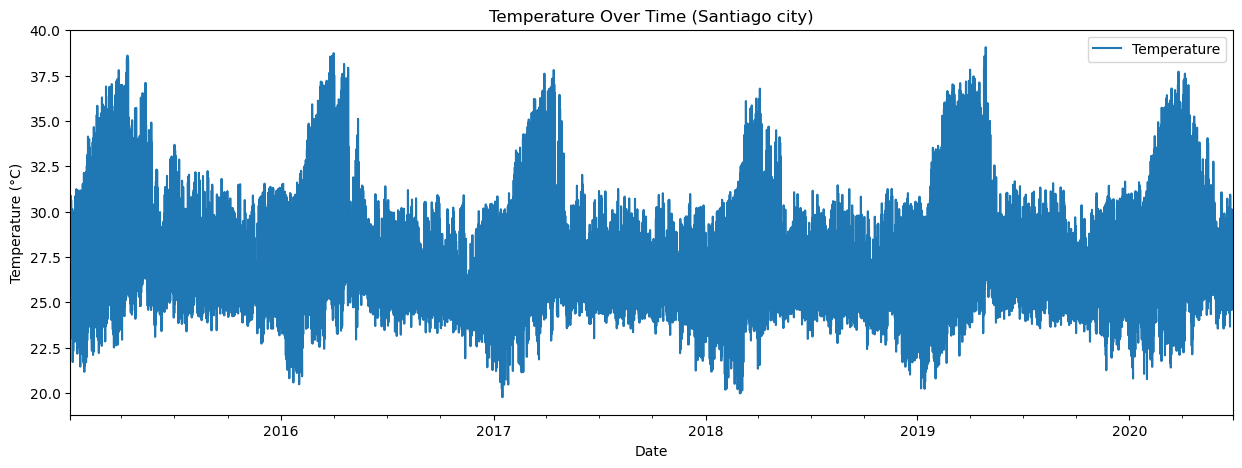

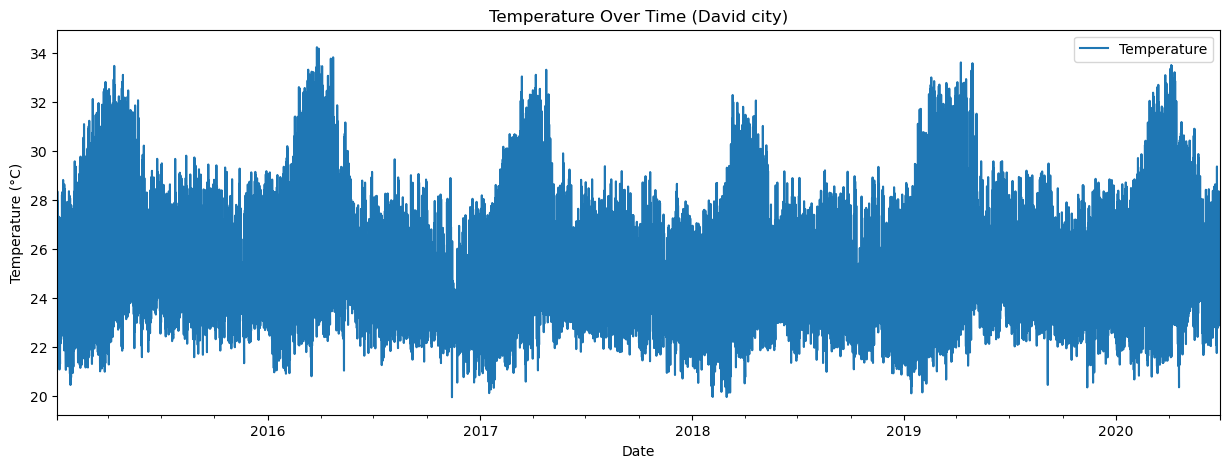

In [10]:
# Temperature over time
Train_data.plot(x="datetime",y="T2M_toc",label ="Temperature",figsize=(15,5))
plt.title('Temperature Over Time  (Tocumen city)')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

Train_data.plot(x="datetime",y="T2M_san",label ="Temperature",figsize=(15,5))
plt.title('Temperature Over Time (Santiago city)')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

Train_data.plot(x="datetime",y="T2M_dav",label ="Temperature",figsize=(15,5))
plt.title('Temperature Over Time (David city)')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

In [11]:
Train_data_demand_extract.T2M_toc = Train_data_demand_extract.T2M_toc.astype(int)
Train_data_demand_extract.T2M_san = Train_data_demand_extract.T2M_san.astype(int)
Train_data_demand_extract.T2M_dav = Train_data_demand_extract.T2M_dav.astype(int)

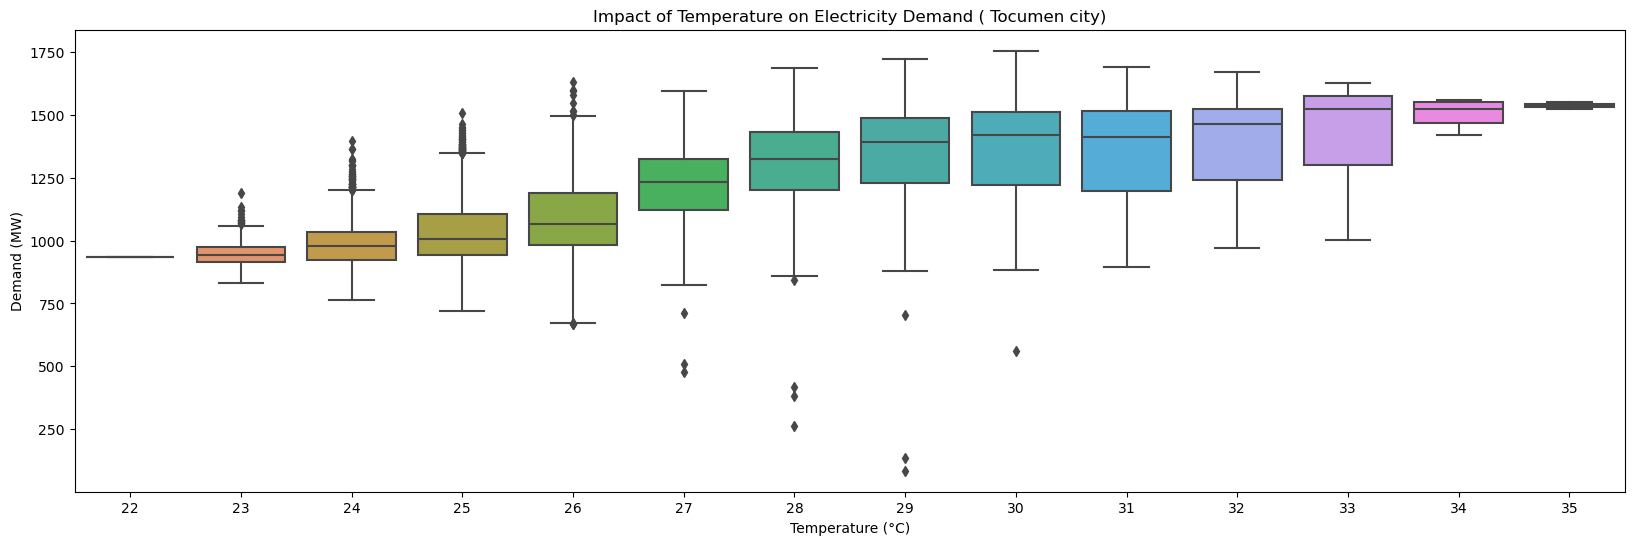

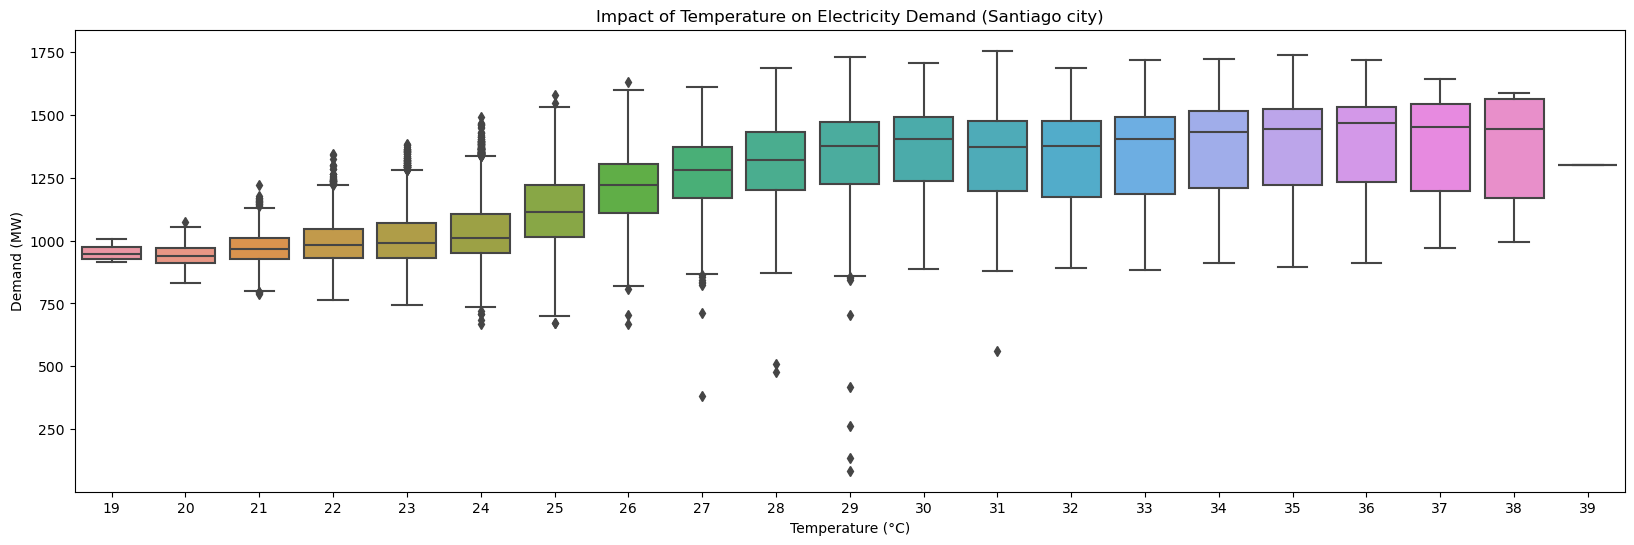

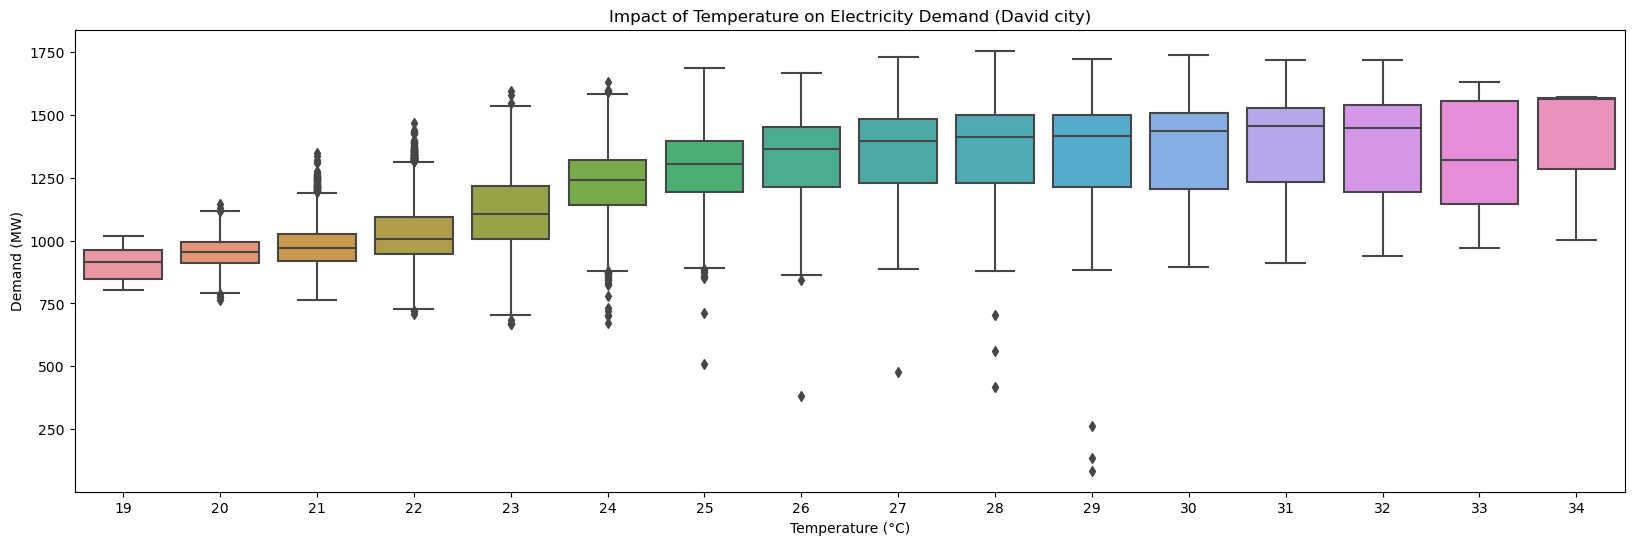

In [12]:
# Impact of Temperature on Electricity Demand
plt.figure(figsize=(20, 6))
sns.boxplot(x='T2M_toc', y='nat_demand', data=Train_data_demand_extract)
plt.title('Impact of Temperature on Electricity Demand ( Tocumen city)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.show()

# Impact of Temperature on Electricity Demand
plt.figure(figsize=(20, 6))
sns.boxplot(x='T2M_san', y='nat_demand', data=Train_data_demand_extract)
plt.title('Impact of Temperature on Electricity Demand (Santiago city)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.show()

# Impact of Temperature on Electricity Demand
plt.figure(figsize=(20, 6))
sns.boxplot(x='T2M_dav', y='nat_demand', data=Train_data_demand_extract)
plt.title('Impact of Temperature on Electricity Demand (David city)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.show()

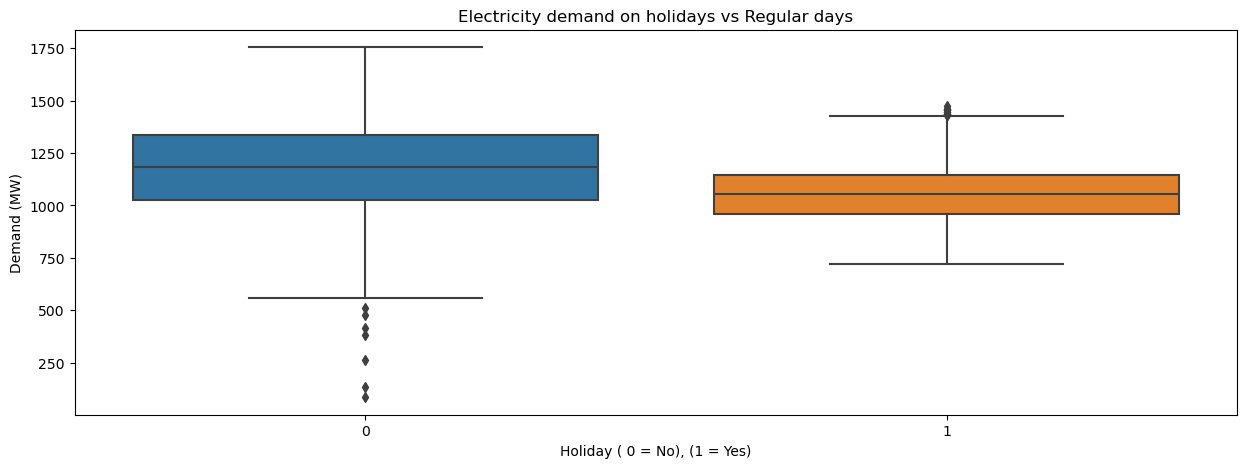

In [13]:
# demand during holidays 
plt.figure(figsize=(15, 5))
sns.boxplot(x='holiday', y='nat_demand', data=Train_data)
plt.title('Electricity demand on holidays vs Regular days')
plt.xlabel('Holiday ( 0 = No), (1 = Yes)')
plt.ylabel('Demand (MW)')
plt.show()

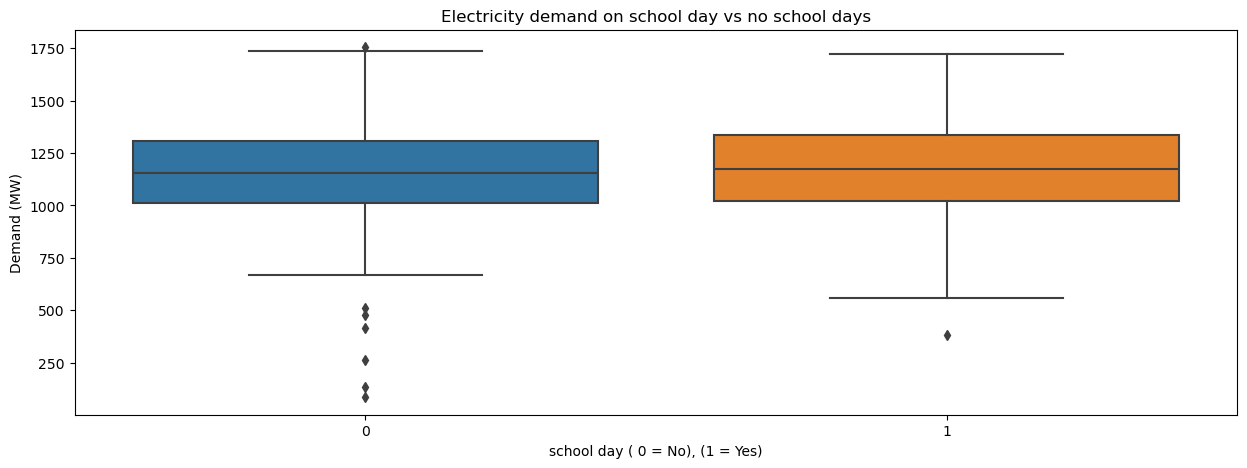

In [14]:
# demand during school days 
plt.figure(figsize=(15, 5))
sns.boxplot(x='school', y='nat_demand', data=Train_data)
plt.title('Electricity demand on school day vs no school days')
plt.xlabel('school day ( 0 = No), (1 = Yes)')
plt.ylabel('Demand (MW)')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


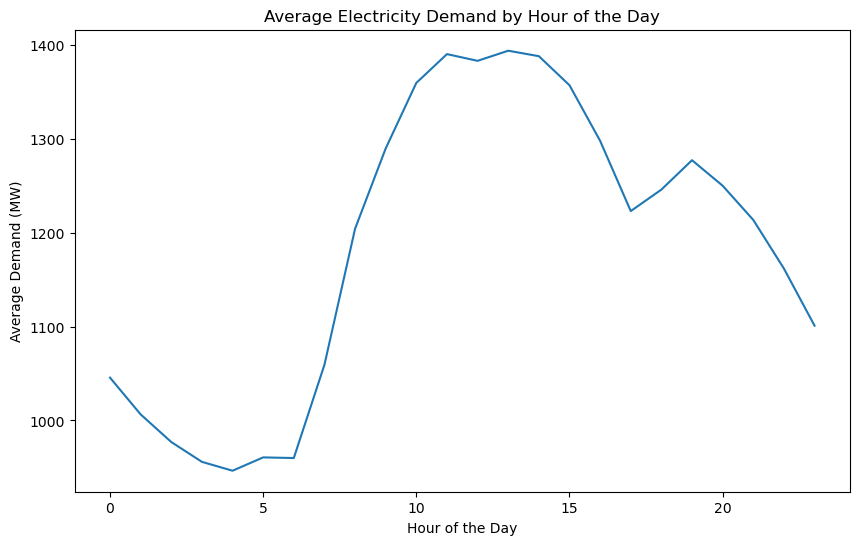

In [15]:
# Line plot of average load by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hourOfDay', y='DEMAND', data=week_data.groupby('hourOfDay').mean().reset_index())
plt.title('Average Electricity Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Demand (MW)')
plt.show()